In [1]:
!source ../.env

In [2]:
import os, argparse
import time

from flask import render_template, flash, redirect, request, url_for, send_from_directory
import pandas as pd

import utils
from stockDB import StockDB
from stockAPI import StockAPI

from constants import (
POSTGRES_USER,
POSTGRES_PASSWORD,
POSTGRES_HOST,
POSTGRES_PORT,
POSTGRES_DB,
APP_KEY,
STOCK_API_KEY
)




SAMPLE_N_ROWS = 30



# ---------------------  Model(Table) is dependent on above methods ---------------------
app = utils.get_flask_app(POSTGRES_USER,
                          POSTGRES_PASSWORD,
                          POSTGRES_HOST,
                          POSTGRES_PORT,
                          POSTGRES_DB,
                          APP_KEY)

from models import db, Students  # Require db object
db.init_app(app)




def get_stockAPI() -> StockAPI:
    stock_api = StockAPI(access_key=STOCK_API_KEY,
                         company_symbol='AAPL',
                         date_from='2021-01-01',
                         date_to='2022-01-01')
    stock_api.get_api_result()
    stock_api.transform_to_dataframe()
    stock_api.save_dataframe_to_csv("data/local_generated.csv")
    return stock_api


# ---------------------  Web page rendering  END ---------------------
# ---------------------  Web page rendering  END ---------------------
# ---------------------  Web page rendering  END ---------------------






stock_api = get_stockAPI()


2022-01-24 19:23:55,085 - stock_api_logger - INFO [utils.py:14 -        get_flask_app() ] Creating flask app, user: None, host: None, port: None, db: None ...


In [3]:
stock_api.df.date 

0      2022-01-14
1      2022-01-13
2      2022-01-12
3      2022-01-11
4      2022-01-10
          ...    
243    2021-01-29
244    2021-01-28
245    2021-01-27
246    2021-01-26
247    2021-01-25
Name: date, Length: 248, dtype: object

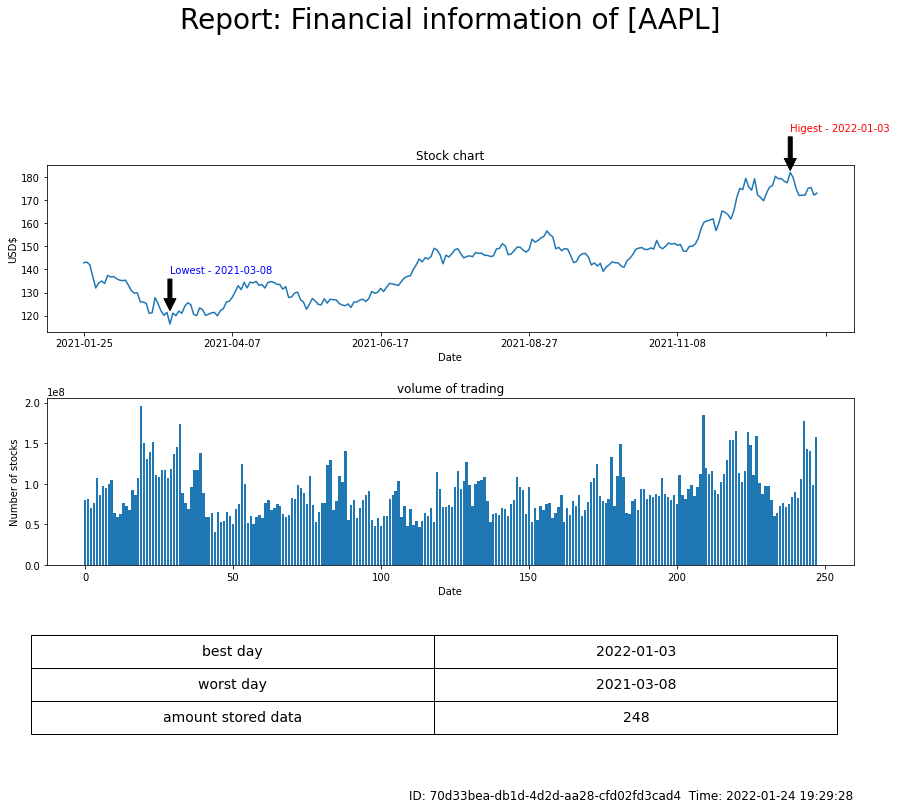

In [4]:
from report import Report

myreport = Report(stock_api.df)
myreport.save_chart(fname="ec2_report.pdf")

In [9]:
myreport